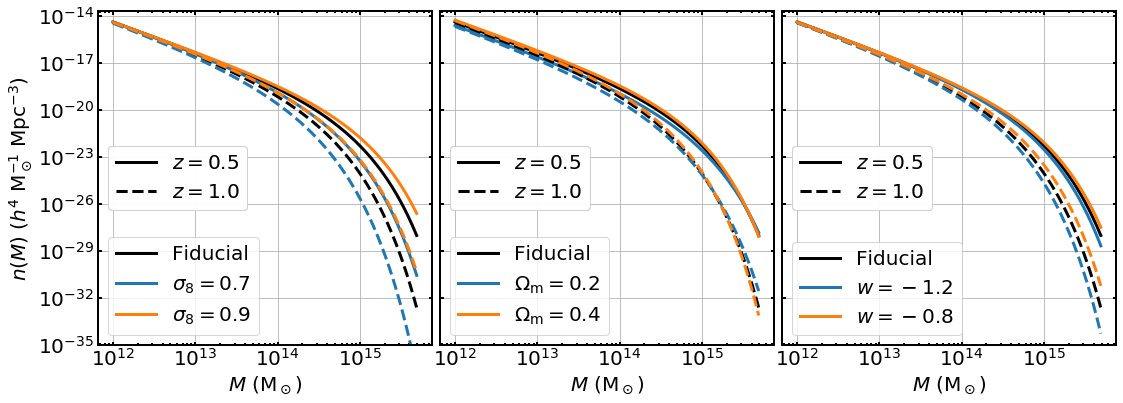

In [3]:
%matplotlib inline

from astropy.cosmology import FlatLambdaCDM, wCDM
from hmf import MassFunction
from itertools import count
from matplotlib import pyplot as plt, rcParams
import numpy as np

# parametros de Planck18
Tcmb0=2.725
h = 0.673
Om0 = 0.316
cparams_fid = dict(H0=100*h, Om0=Om0, Ob0=0.022/h**2, Tcmb0=Tcmb0)
cosmo_fid = FlatLambdaCDM(**cparams_fid)
sigma8_fid = 0.81
hmf_kwargs = {'Mmin': 12, 'Mmax': 15.7, 'transfer_model': 'EH'}

rcParams['font.size'] = 20
rcParams['axes.linewidth'] = 2
for p in ['xtick.major.width', 'xtick.minor.width', 'ytick.major.width', 'ytick.minor.width']:
    rcParams[p] = 2
rcParams['lines.linewidth'] = 3
fig, axes = plt.subplots(figsize=(16,6), ncols=3)

zx = (0.5, 1.0)
for z, ls in zip(zx, ('-', '--', ':')):
    hmf_kwargs['z'] = z
    hmf_fiducial = MassFunction(
        cosmo_model=cosmo_fid, sigma_8=sigma8_fid, **hmf_kwargs)
    for ax in axes:
        label = 'Fiducial' if ls == '-' else '_none_'
        ax.plot(hmf_fiducial.m, hmf_fiducial.dndm, 'k{0}'.format(ls), label=label)
    # Variando amplitud de fluctuaciones
    for i, s8 in enumerate((0.7, 0.9)):
        hmf = MassFunction(cosmo_model=cosmo_fid, sigma_8=s8, **hmf_kwargs)
        label = r'$\sigma_8={0}$'.format(s8) if ls == '-' else '_none_'
        axes[0].plot(hmf.m, hmf.dndm, 'C{0}'.format(i), ls=ls, label=label)
    # Variando densidad de materia (oscura)
    for i, Om in enumerate((0.2, 0.4)):
        cparams = cparams_fid.copy()
        cparams['Om0'] = Om
        cparams['Ob0'] *= (Om/Om0)
        cosmo = FlatLambdaCDM(**cparams)
        hmf = MassFunction(cosmo_model=cosmo, sigma_8=sigma8_fid, **hmf_kwargs)
        label = r'$\Omega_\mathrm{{m}}={0}$'.format(Om) if ls == '-' else '_none_'
        axes[1].plot(hmf.m, hmf.dndm, 'C{0}'.format(i), ls=ls, label=label)
    # Variando H0
    for i, w in enumerate((-1.2, -0.8)):
        cparams = cparams_fid.copy()
        cparams['w0'] = w
        cparams['Ode0'] = 1 - cparams['Om0']
        cosmo = wCDM(**cparams)
        hmf = MassFunction(cosmo_model=cosmo, sigma_8=sigma8_fid, **hmf_kwargs)
        label = r'$w={0}$'.format(w) if ls == '-' else '_none_'
        axes[2].plot(hmf.m, hmf.dndm, 'C{0}'.format(i), ls=ls, label=label)

for ax in axes:
    ax.grid(True)
    legend = ax.legend()
    ax.add_artist(legend)
    lines = ax.plot([], [], 'k-', [], [], 'k--')
    legend = ax.legend(lines, ['$z={0}$'.format(z) for z in zx], loc='center left')
    ax.add_artist(legend)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1e-35, 2e-14)
    ax.set_xlabel('$M$ (M$_\odot$)')
axes[0].set_ylabel('$n(M)$ ($h^4$ M$_\odot^{-1}$ Mpc$^{-3}$)')
for ax in axes[1:]:
    ax.set_yticklabels([])
fig.tight_layout(w_pad=0.4)